<img src='https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/tools/frameworks/-/raw/main/img/OSI-SAF_banner.png' align='right' width='100%'/>

<a href="../Index.ipynb" target="_blank"><< Index</a>
<br>
<a href="./2_1_OSI_SAF_sea_ice_Monthly_concentration_anomalies.ipynb" target="_blank"><< Compute monthly mean sea-ice concentration anomaly from EUMETSAT OSI SAF data</a>

<font color="#138D75">**EUMETSAT OSI SAF Training Service**</font> <br>
**Copyright:** 2024 EUMETSAT <br>
**License:** MIT <br>
**Authors:** Thomas Lavergne (Meteorologisk institutt/OSI SAF), Gwenaël Le Bras (Météo-France/OSI SAF)

<i>This notebook is adapted from a notebook available on T.Lavergne <a href="https://github.com/TomLav/snippets/blob/main/Sea%20Ice%20Spiral%20with%20EUMETSAT%20OSI%20SAF%20data.ipynb">git repository </a>.</i>

<html>
  <div style="width:100%">
    <div style="float:left"><a href="https://mybinder.org/v2/git/https%3A%2F%2Fgitlab.eumetsat.int%2Feumetlab%2Foceans%2Focean-training%2Fsensors%2Flearn-osi-saf-sea-ice/HEAD?labpath=2_OSI_SAF_sea_ice_use_case%2F2_2_OSI_SAF_sea_ice_plot_anomaly_as_a_spiral.ipynb"><img src="https://mybinder.org/badge_logo.svg" alt="Open in Binder"></a></div>
    <div style="float:left"><p>&emsp;</p></div>
  </div>
</html>

<div class="alert alert-block alert-success">
<h3>Learn OSI SAF sea ice parameters : Use case</h3></div>


<div class="alert alert-block alert-warning">
    
<b>PREREQUISITES </b>
    
There are no prerequisite notebooks for this module.
</div>
<hr>

# 2.2 Use case : Plot sea ice index data as a Spiral

### Data used 

| Dataset | EUMETSAT collection ID | OSI SAF website description | OSI SAF identifier |
|:-----------------:|:-----------------:|:-----------------:|:-----------------:|
| Sea ice index | EO:EUM:DAT:0875  | <a href="https://osi-saf.eumetsat.int/products/osi-420" target="_blank">Description</a> | OSI-420 |

### Learning outcomes

At the end of this notebook you will know;
* How to access Sea Ice Index data from Thredds
* Plot Sea Ice Index
* Plot a spiral

<div class="alert alert-info" role="alert">

## <a id='TOC-TOP'></a>Contents

</div>
    
 1. [Creating the workspace](#section1)
 1. [Mapping from the Sea Ice Index - Basic plot](#section2)
 1. [Mapping from the Sea Ice Index - Daily data over a year](#section3)
 1. [Mapping from the Sea Ice Index - Daily data in a spiral](#section4)

<hr>

The Sea Ice Index is a climate indicator of sea-ice coverage. The index allows visualisations of the sea-ice extent and area at both poles over the last 45+ years, and is continuously updated to present time. It consists of an updated series of graphs (.png) visualising the trends and evolution of sea ice at hemispheric, global and regional scales. In addition, the data files (.txt and .nc) are available for users who are interested in analysing and plotting the data themselves.
Here we will access these data files using the Thredds distribution, and plot it first as a "classic" timeseries plot similar to <a href="https://osisaf-hl.met.no/v2p2-sea-ice-index" target="_blank">the ones available on the index</a>, and then as a spiral (inspired from the original work of Ed Hawkins).

#### Inspiration
* OSI SAF Sea Ice Index: https://osisaf-hl.met.no/v2p2-sea-ice-index<BR>
* Ed Hawkins original Temperature spiral: https://www.climate-lab-book.ac.uk/2016/spiralling-global-temperatures/

<div class="alert alert-info" role="alert">

## <a id='section1'></a>1. Creating the workspace
[Back to top](#TOC-TOP)

</div>

We begin by importing all of the libraries that we need to run this notebook. If you have built your python using the environment file provided in this repository, then you should have everything you need. For more information on building environment, please see the repository **<a href="../README.md" target="_blank">README</a>**.

In [9]:
import os
import numpy as np
import xarray as xr
from matplotlib import pylab as plt
from matplotlib import cm
from matplotlib import ticker
import calendar

We then set basic variables to be used in our plot. Here we will define the area we want to work with : "sh" will be used for ploting data on the southern hemisphere, and "nh" for the northern hemisphere.

In [11]:
# defining which hemisphere we want to work on
area = 'nh'

#basic informations common to all plots
months = []
for i in range(1,13):
    months.append(calendar.month_name[i][:3])
    
source = "EUMETSAT OSI SAF data with R&D input from ESA CCI"
version = 'v2.2'

# defining area_full depending on area to be used in plot legend
if area == 'sh': area_full = 'Southern Hemisphere'
elif area == 'nh': area_full = 'Northern Hemisphere'
else : area_full = 'Area not well defined'

print('Area defined : ' + area_full.upper())

Area defined : NORTHERN HEMISPHERE


And finally, we create a specific folder to hold the time-series we will be producing.

In [13]:
download_dir = os.path.join(os.getcwd(), "anomalies", "time-series")
os.makedirs(download_dir, exist_ok=True)

### Read Sea Ice Extent data

We then set to read OSI SAF data from the Thredds server at the <a href="https://www.met.no/en" target="_blank">Norwegian Meteorological Institute</a>.

In [16]:
url = "https://thredds.met.no/thredds/dodsC/osisaf/met.no/ice/index/v2p2/{a:}/osisaf_{a:}_sie_daily.nc".format(a=area)

In [17]:
ds = xr.open_dataset(url)

In [18]:
print("Last data point: {}".format(np.datetime_as_string(ds['time'].values[-1])))

Last data point: 2025-06-10T00:00:00.000000000


<div class="alert alert-info" role="alert">

## <a id='section2'></a>2. Mapping from the sea ice index - Basic plot
[Back to top](#TOC-TOP)

</div>



Once we define to Thredds what we want to read, we can directly start ploting them. Let us start with ploting the monthly average sea ice extend over the period covered by the Sea Ice Index (25/10/1978 to current time).

/var/folders/g1/kc7vb5f55nd4bb_5hc6j61x80000gn/T/ipykernel_85248/4072747389.py:1: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot_date(ds['time'][::15],ds['sie'][::15],ls='-',color='crimson',marker=None)


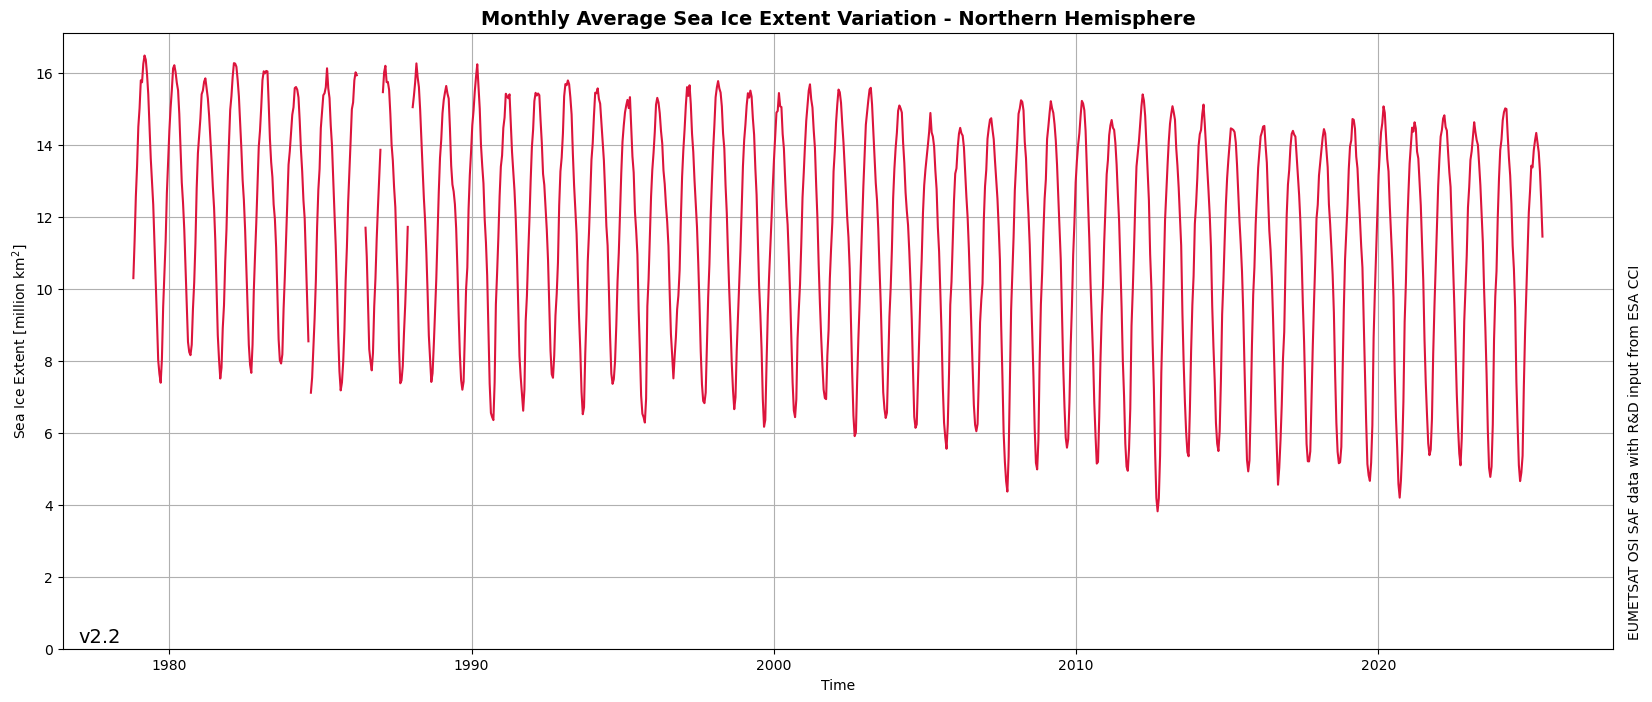

In [21]:
plt.plot_date(ds['time'][::15],ds['sie'][::15],ls='-',color='crimson',marker=None)
fig = plt.gcf()
fig.set_size_inches((20,8))
ax = plt.gca()
ax.set_xlabel('Time')
ax.set_ylabel(r"Sea Ice Extent [million km$^2$]")
ax.set_title('Monthly Average Sea Ice Extent Variation - '+area_full, fontsize=14, fontweight='bold')
ax.set_ylim(0,None)
ax.grid()

ax.text(0.01,0.01,version,fontsize=14,transform=ax.transAxes)
ax.text(1.01, 0.02, source, rotation=90,transform=ax.transAxes)

plt.show()

<div class="alert alert-info" role="alert">

## <a id='section3'></a>3. Mapping from the sea ice Index - Daily data over a year
[Back to top](#TOC-TOP)

</div>


In order to better visualize the yearly variation, we can then plot ever year on the same graph, displaying daily values.

In [24]:
ds_year = ds.groupby('time.year')

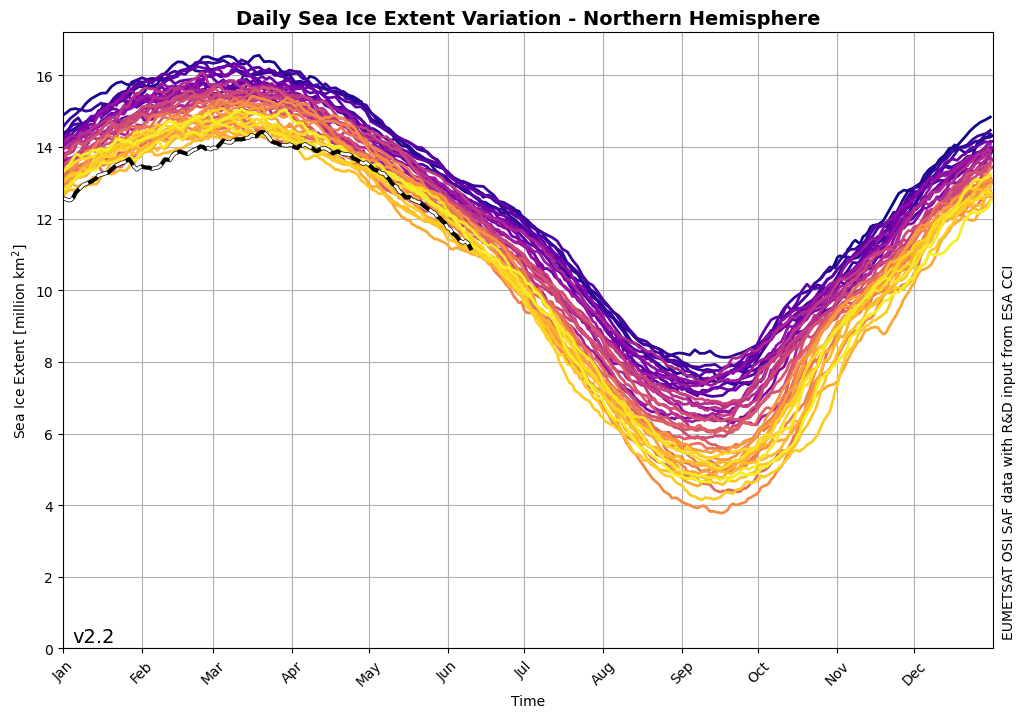

In [25]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)

years = np.array(list(ds_year.groups.keys()))
for year in years:
    one_year = ds_year[year]
    
    yfrac = ( year - years.min() ) / ( years.max()-years.min() )
    
    # current year to be in hatched black and white
    if year == years[-1]:
        ax.plot(one_year['time.dayofyear'], one_year['sie'], ls='-', marker=None, color='k', lw=3)
        ax.plot(one_year['time.dayofyear'], one_year['sie'], dashes=[4, 4], marker=None, color='white', lw=2)
    # previous years each in a different colors
    else:
        col = cm.plasma( yfrac )
        ax.plot(one_year['time.dayofyear'], one_year['sie'], ls='-', marker=None, color=col, lw=2)

months_tick = [1,]
for i in range(1,12):
    months_tick.append(calendar.monthrange(1970, i)[1])
months_tick = np.array(months_tick)  
months_tick = months_tick.cumsum()

    
ax.set_ylim(0,None)
ax.set_xlim(1,366)
ax.set_xlabel('Time')
ax.set_ylabel(r"Sea Ice Extent [million km$^2$]")
ax.set_title('Daily Sea Ice Extent Variation - '+area_full, fontsize=14, fontweight='bold')
ax.set_xticks(months_tick)
ax.set_xticklabels(months, rotation=45)
ax.grid()

ax.text(0.01,0.01,version,fontsize=14,transform=ax.transAxes)
ax.text(1.01, 0.02, source, rotation=90,transform=ax.transAxes)
#ax.text(0.01,1.01,area_full.upper(),fontsize=14,transform=ax.transAxes)

plt.savefig('./anomalies/time-series/osisaf_sie_{a:}_timeseries.png'.format(a=area), bbox_inches='tight', facecolor='white')

plt.show()

<div class="alert alert-info" role="alert">

## <a id='section4'></a>4. Mapping from the Sea Ice Index - Daily data in a spiral
[Back to top](#TOC-TOP)

</div>

Our spiral will display the same informations as ploted above, but displayed in a continuous spiral.

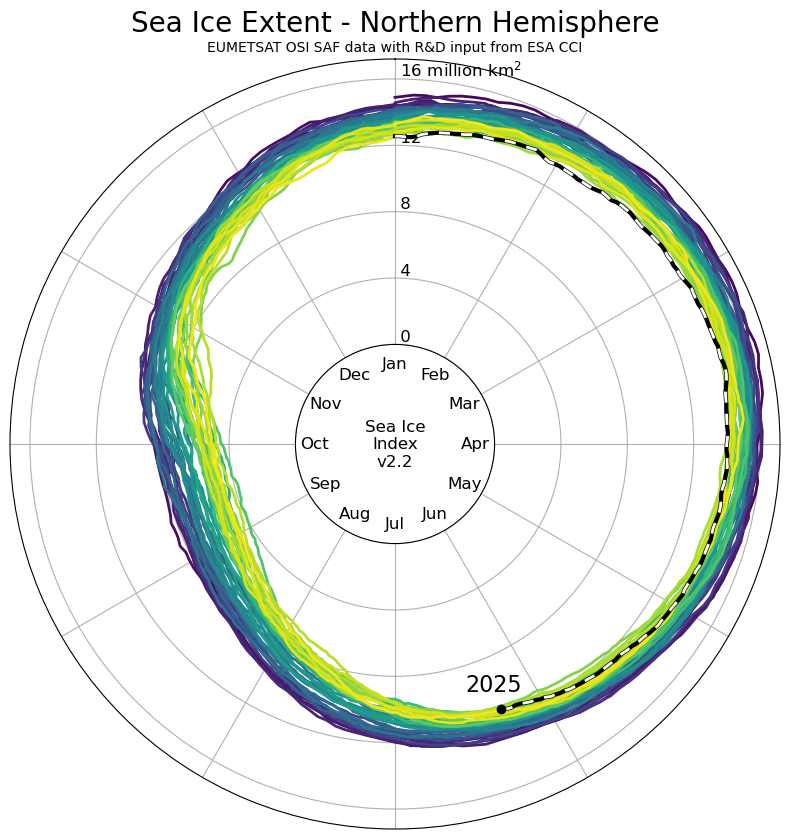

In [28]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
fig.set_size_inches((10,10))

years = np.array(list(ds_year.groups.keys()))
for year in years:
    if year < 1979:
        continue
    one_year = ds_year[year]
    
    yfrac = ( year - years.min() ) / ( years.max()-years.min() )
    doy = one_year['time.dayofyear']
    phi = (doy - doy.min()) / (365 + calendar.isleap(year) - doy.min()) * 2 * np.pi
    
    if year == years[-1]:
        col = 'k'
        ax.plot(phi, one_year['sie'], ls='-', marker=None, color=col, lw=3)
        ax.plot(phi, one_year['sie'], dashes=[4,4], marker=None, color='w', lw=2)
        ax.plot(phi[-1], one_year['sie'][-1], marker='o', color=col, lw=2)
        ax.text(phi[-1], one_year['sie'][-1]*0.9, year, color=col, fontsize=16, ha='center')
    else:
        col = cm.viridis( yfrac )
        ax.plot(phi, one_year['sie'], ls='-', marker=None, color=col, lw=2)


months_tick = np.arange(1,13)
months_tick = (months_tick - 1) / 12.
months_tick *= 2 * np.pi

rticks = np.arange(0,18+0.1,4)
rticklabels = [' '+str(int(s)) for s in rticks]
rticklabels[-1] += ' million km$^2$'
ax.set_rgrids(rticks, labels=rticklabels,fontsize=12)

ax.set_xticks(months_tick)
ax.set_xticklabels(months, fontsize=12)
ax.set_rlabel_position(0)

ax.set_theta_direction(-1)
ax.set_theta_zero_location('N')
ax.set_rorigin(-6)

ax.tick_params(labelleft=True, labelright=False,
               labeltop=True, labelbottom=False)

ax.set_title('Sea Ice Extent - ' + area_full, pad=20, fontsize=20)
ax.text(0.5, 1.01, source, ha='center', transform=ax.transAxes)
ax.text(0.5,0.5,'Sea Ice\nIndex\n'+version,ha='center',va='center',fontsize=12,transform=ax.transAxes)

ax.grid(True)

plt.savefig('./anomalies/time-series/osisaf_sie_{a:}_spiral.png'.format(a=area), bbox_inches='tight', facecolor='white')

plt.show()

Other visualisation of the data are available on our <a href="https://osisaf-hl.met.no/v2p2-sea-ice-index">Sea-Ice Index page</a>. The <a href="https://cryo.met.no/en/"> Cryo page</a> of the Norwegian Meteorological Institute offer other visualisations of our Sea Ice Index. In particular, you can find regional visuals, and interactive visualisation for both <a href="https://cryo.met.no/en/sea-ice-index-daily">daily</a> and <a href="https://cryo.met.no/en/sea-ice-index-monthly">monthly</a> data. Have a look at it!

<hr>
<a href="../Index.ipynb" target="_blank"><< Index</a>
<br>
<a href="./2_1_OSI_SAF_sea_ice_Monthly_concentration_anomalies.ipynb" target="_blank"><< Compute monthly mean sea-ice concentration anomaly from EUMETSAT OSI SAF data</a>
<hr>
<a href="https://gitlab.eumetsat.int/eumetlab/ocean">View on GitLab</a> | <a href="https://training.eumetsat.int/">EUMETSAT Training</a> | <a href=mailto:ops@eumetsat.int>Contact helpdesk for support </a> | <a href=mailto:training@eumetsat.int>Contact our training team to collaborate on and reuse this material</a></span></p>